<a href="https://colab.research.google.com/github/caprolaliac/MLPrac/blob/main/sentiment-analysis/sen_ana_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import re
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
df = pd.read_csv('/content/drive/MyDrive/proc/yelp.csv')

def categorize_rating(rating):
    if rating in [4, 5]:
        return 'positive'
    elif rating == 3:
        return 'neutral'
    else:
        return 'negative'

df['category'] = df['class_index'].apply(categorize_rating)

stemmer = PorterStemmer()
STOPWORDS = set(stopwords.words('english'))

corpus = []
for i in range(0, df.shape[0]):
    review = re.sub('[^a-zA-Z]', ' ', df.iloc[i]['review_text'])
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if word not in STOPWORDS]
    review = ' '.join(review)
    corpus.append(review)
df['processed_review'] = corpus
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['category'])

X_train, X_test, y_train, y_test = train_test_split(df['processed_review'],
                                                    df['category_encoded'],
                                                    test_size=0.2,
                                                    random_state=42)

max_words = 10000
max_len = 400

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("Unique values in y_train:", np.unique(y_train))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Epoch 1/100
1125/1125 [==============================] - 499s 437ms/step - loss: -391.1594 - accuracy: 0.3413 - val_loss: -1436.0374 - val_accuracy: 0.4308
Epoch 2/100
1125/1125 [==============================] - 483s 429ms/step - loss: -3242.0437 - accuracy: 0.3607 - val_loss: -5575.6860 - val_accuracy: 0.4428
Epoch 3/100
1125/1125 [==============================] - 482s 428ms/step - loss: -9041.4902 - accuracy: 0.4210 - val_loss: -11618.2041 - val_accuracy: 0.3980
Epoch 4/100
1125/1125 [==============================] - 481s 428ms/step - loss: -17813.1387 - accuracy: 0.4120 - val_loss: -20761.4062 - val_accuracy: 0.2177
Epoch 5/100
1125/1125 [==============================] - 482s 429ms/step - loss: -28813.4375 - accuracy: 0.4103 - val_loss: -31275.3730 - val_accuracy: 0.3995
Epoch 6/100
1125/1125 [==============================] - 485s 431ms/step - loss: -41964.8477 - accuracy: 0.4302 - val_loss: -44636.8320 - val_accuracy: 0.4095
Epoch 7/100
1125/1125 [=============================

In [ ]:
from tensorflow.keras.optimizers import Adam
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=[early_stop]
                    )

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

predictions = model.predict(X_test)


Epoch 1/100
1125/1125 [==============================] - 108s 90ms/step - loss: 0.6796 - accuracy: 0.7085 - val_loss: 0.6040 - val_accuracy: 0.7362
Epoch 2/100
1125/1125 [==============================] - 71s 63ms/step - loss: 0.5249 - accuracy: 0.7836 - val_loss: 0.6223 - val_accuracy: 0.7372
Epoch 3/100
1125/1125 [==============================] - 62s 55ms/step - loss: 0.4450 - accuracy: 0.8214 - val_loss: 0.6456 - val_accuracy: 0.7318
Epoch 4/100
1125/1125 [==============================] - 60s 53ms/step - loss: 0.3735 - accuracy: 0.8531 - val_loss: 0.6944 - val_accuracy: 0.7215
Epoch 5/100
1125/1125 [==============================] - 61s 54ms/step - loss: 0.3185 - accuracy: 0.8801 - val_loss: 0.7786 - val_accuracy: 0.7078
Epoch 6/100
313/313 [==============================] - 9s 25ms/step - loss: 0.8993 - accuracy: 0.7215
Test accuracy: 0.7215
313/313 [==============================] - 7s 19ms/step


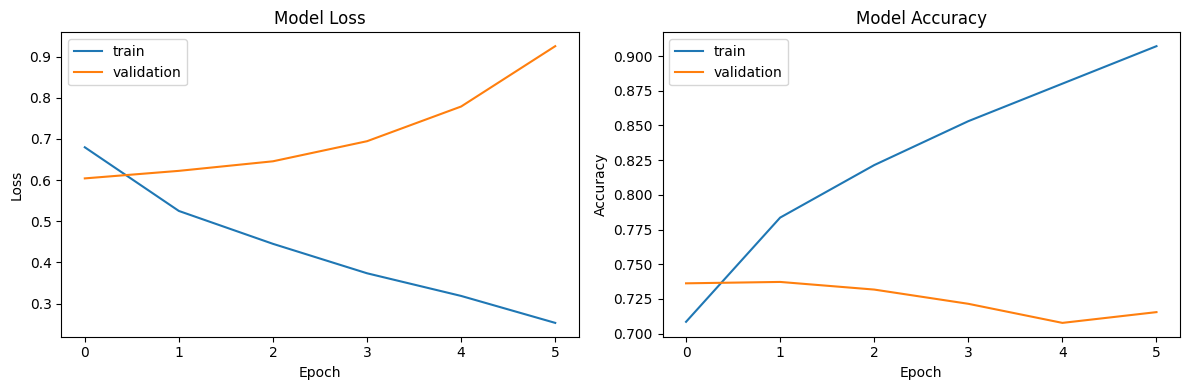

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

313/313 [==============================] - 6s 20ms/step


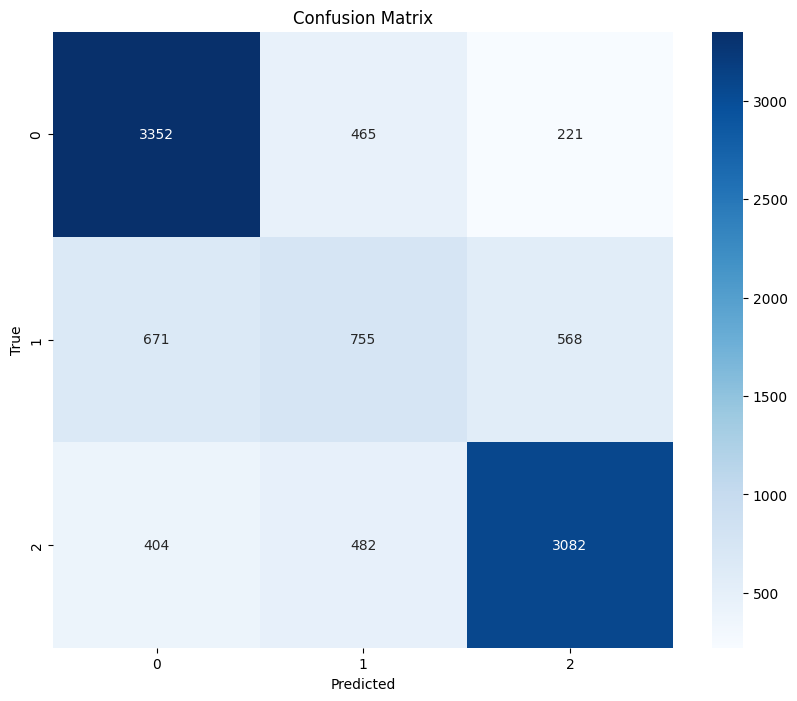

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()